In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

In [21]:
df = pd.read_csv('races.csv')
df = df[df.team1.str.startswith('Wild')]
df = df.replace('unknown', np.nan)
df.shape

(1113, 20)

In [22]:
df_dogs = pd.read_csv('dogs.csv')
df_dogs.shape

(51, 8)

In [23]:
df_dogs['birth'] = pd.to_datetime(df_dogs['birth'])
df_dogs['age'] = pd.Timestamp('2024-01-01') - df_dogs['birth']
df_dogs['age'] = df_dogs['age'] / pd.Timedelta(days=365)
df_dogs['runs'] = 0
df_dogs['wrong_start'] = 0
df_dogs['good_start'] = 0
df_dogs['total_start'] = 0.0
df_dogs['wrong_change'] = 0
df_dogs['good_change'] = 0
df_dogs['total_change'] = 0.0
df_dogs['total_time'] = 0
df_dogs.set_index('name', inplace=True)
df_dogs.head()

,trainer,breed,sex,neutered,birth,ulna_length,jump_height,age,runs,wrong_start,good_start,total_start,wrong_change,good_change,total_change,total_time
name,,,,,,,,,,,,,,,,
Dexter,TM800418,Kooikerhondje,M,Y,2010-02-14,14.05,25.0,13.887671,0,0,0,0.0,0,0,0.0,0
Jasper,NP950613,Border Collie,M,Y,2011-03-28,16.56,30.0,12.772603,0,0,0,0.0,0,0,0.0,0
Angie,UF830429,Border Collie,F,Y,2014-02-06,15.22,27.5,9.906849,0,0,0,0.0,0,0,0.0,0
Alex,ZE801127,Border Collie,M,Y,2014-04-22,17.95,32.5,9.701370,0,0,0,0.0,0,0,0.0,0
Ashley,DP910919,Border Collie,F,Y,2015-01-26,18.30,32.5,8.936986,0,0,0,0.0,0,0,0.0,0


In [24]:
df_run1 = df[['division', 'team1', 'hurdles', 'name1', 'start_chng1', 'time1']]
df_run2 = df[['division', 'team1', 'hurdles', 'name2', 'start_chng2', 'time2']]
df_run3 = df[['division', 'team1', 'hurdles', 'name3', 'start_chng3', 'time3']]
df_run4 = df[['division', 'team1', 'hurdles', 'name4', 'start_chng4', 'time4']]

col_names = ['division', 'team', 'hurdles', 'name', 'start_chng', 'time']
df_run1.columns = col_names
df_run2.columns = col_names
df_run3.columns = col_names
df_run4.columns = col_names

df_run1 = df_run1.dropna()
df_run2 = df_run2.dropna()
df_run3 = df_run3.dropna()
df_run4 = df_run4.dropna()

df_runs_234 = pd.concat([df_run2, df_run3, df_run4], axis=0)
df_runs_all = pd.concat([df_run1, df_run2, df_run3, df_run4], axis=0)
print(df_runs_all.shape)
df_runs_all.head()

(4370, 6)


,division,team,hurdles,name,start_chng,time
0,1,WildRunners dreamers,25.0,Sunny,-0.24,4.21
1,1,WildRunners Maximini,25.0,Brooke,-0.11,4.08
2,1,WildRunners dreamers,25.0,Sunny,0.02,4.25
3,1,WildRunners Maximini,25.0,Brooke,-0.63,4.25
4,1,WildRunners dreamers,25.0,Sunny,-0.06,4.21


In [25]:
for _, row in df_run1.iterrows():
    division, team, hurdles, name, start, time = row
    df_dogs.loc[name, 'runs'] += 1
    df_dogs.loc[name, 'total_time'] += time

    if start < 0:
        df_dogs.loc[name, 'wrong_start'] += 1
    else:
        df_dogs.loc[name, 'good_start'] += 1
        df_dogs.loc[name, 'total_start'] += start

for _, row in df_runs_234.iterrows():
    division, team, hurdles, name, change, time = row
    df_dogs.loc[name, 'runs'] += 1
    df_dogs.loc[name, 'total_time'] += time

    if change < 0:
        df_dogs.loc[name, 'wrong_change'] += 1
    else:
        df_dogs.loc[name, 'good_change'] += 1
        df_dogs.loc[name, 'total_change'] += change

df_dogs.head(10)

/tmp/ipykernel_127189/1860864740.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.21' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_dogs.loc[name, 'total_time'] += time


,trainer,breed,sex,neutered,birth,ulna_length,jump_height,age,runs,wrong_start,good_start,total_start,wrong_change,good_change,total_change,total_time
name,,,,,,,,,,,,,,,,
Dexter,TM800418,Kooikerhondje,M,Y,2010-02-14,14.05,25.0,13.887671,79,3,29,3.520,5,42,12.89,363.17
Jasper,NP950613,Border Collie,M,Y,2011-03-28,16.56,30.0,12.772603,37,0,8,1.840,1,28,12.50,220.56
Angie,UF830429,Border Collie,F,Y,2014-02-06,15.22,27.5,9.906849,32,0,3,0.340,2,27,19.97,189.18
Alex,ZE801127,Border Collie,M,Y,2014-04-22,17.95,32.5,9.701370,129,0,16,1.568,6,107,18.95,551.22
Ashley,DP910919,Border Collie,F,Y,2015-01-26,18.30,32.5,8.936986,62,0,0,0.000,2,60,31.16,265.63
Bella,OJ941014,American Staffordshire Terrier,F,Y,2015-02-27,14.70,25.0,8.849315,157,0,0,0.000,17,140,48.49,740.86
Gordon,HO800728,Jack Russell Terrier,M,Y,2015-04-12,9.67,15.0,8.728767,115,2,2,0.640,8,103,43.96,803.07
Negro,UR870607,Mix,M,Y,2015-04-14,15.77,27.5,8.723288,84,10,16,2.820,5,53,24.09,421.07
Fibo,RK871018,Magyar Vizsla,M,Y,2015-05-21,17.99,32.5,8.621918,0,0,0,0.000,0,0,0.00,0.00


In [26]:
df_dogs = df_dogs[df_dogs['runs'] >= 10]                                   # I drop all dogs with less than 10 runs
df_dogs['wrong_start_ratio'] = df_dogs['wrong_start'] / df_dogs['runs'] * 100
df_dogs['wrong_change_ratio'] = df_dogs['wrong_change'] / df_dogs['runs'] * 100
df_dogs['avg_start'] = df_dogs['total_start'] / df_dogs['good_start']
df_dogs['avg_change'] = df_dogs['total_change'] / df_dogs['good_change']
df_dogs['avg_time'] = df_dogs['total_time'] / df_dogs['runs']
df_dogs.head(5)

,trainer,breed,sex,neutered,birth,ulna_length,jump_height,age,runs,wrong_start,good_start,total_start,wrong_change,good_change,total_change,total_time,wrong_start_ratio,wrong_change_ratio,avg_start,avg_change,avg_time
name,,,,,,,,,,,,,,,,,,,,,
Dexter,TM800418,Kooikerhondje,M,Y,2010-02-14,14.05,25.0,13.887671,79,3,29,3.520,5,42,12.89,363.17,3.797468,6.329114,0.121379,0.306905,4.597089
Jasper,NP950613,Border Collie,M,Y,2011-03-28,16.56,30.0,12.772603,37,0,8,1.840,1,28,12.50,220.56,0.000000,2.702703,0.230000,0.446429,5.961081
Angie,UF830429,Border Collie,F,Y,2014-02-06,15.22,27.5,9.906849,32,0,3,0.340,2,27,19.97,189.18,0.000000,6.250000,0.113333,0.739630,5.911875
Alex,ZE801127,Border Collie,M,Y,2014-04-22,17.95,32.5,9.701370,129,0,16,1.568,6,107,18.95,551.22,0.000000,4.651163,0.098000,0.177103,4.273023
Ashley,DP910919,Border Collie,F,Y,2015-01-26,18.30,32.5,8.936986,62,0,0,0.000,2,60,31.16,265.63,0.000000,3.225806,NaN,0.519333,4.284355


## Checking if dogs always belong to the same team and division

### No, they don't

In [27]:
dogs = {}
for _, row in df_runs_all.iterrows():
    division, team, hurdles, name, start_chng, time = row
    if name not in dogs:
        dogs[name] = {
            'teams': set(),
            'divisions': set(),
            'hurdles': set()
        }
    dogs[name]['teams'].add(team)
    dogs[name]['divisions'].add(division)
    dogs[name]['hurdles'].add(hurdles)

from icecream import ic
ic(dogs)

ic| dogs: {'Abby': {'divisions': {2, 5, 6},
                    'hurdles': {25.0, 27.5, 22.5, 15.0},
                    'teams': {'WildRunners XXL', 'WildRunners Zephyr'}},
           'Agnes': {'divisions': {8, 2},
                     'hurdles': {25.0, 27.5, 15.0},
                     'teams': {'WildRunners XXL', 'WildRunners Zephyr'}},
           'Alex': {'divisions': {1, 2, 3, 4, 5},
                    'hurdles': {32.5, 22.5, 25.0, 27.5, 30.0},
                    'teams': {'WildRunners Maximini',
                              'WildRunners Nightfall',
                              'WildRunners Zephyr',
                              'WildRunners dreamers'}},
           'Alfie': {'divisions': {1, 2, 3},
                     'hurdles': {25.0, 27.5, 22.5},
                     'teams': {'WildRunners Zephyr',
                               'WildRunners dreamers',
                               'WildRunners hopefuls'}},
           'Angie': {'divisions': {8, 2, 13},
                    

{'Sunny': {'teams': {'WildRunners Maximini', 'WildRunners dreamers'},
  'divisions': {1, 2, 3, 4},
  'hurdles': {25.0, 27.5, 30.0, 32.5}},
 'Brooke': {'teams': {'WildRunners Maximini',
   'WildRunners Nightfall',
   'WildRunners dreamers'},
  'divisions': {1, 2, 3, 4, 9},
  'hurdles': {25.0, 27.5}},
 'Enola': {'teams': {'WildRunners hopefuls'},
  'divisions': {1, 3},
  'hurdles': {22.5, 27.5, 30.0}},
 'Dusty': {'teams': {'WildRunners Wonders',
   'WildRunners XXL',
   'WildRunners Zephyr'},
  'divisions': {2, 3, 4, 6, 8},
  'hurdles': {15.0, 22.5, 27.5}},
 'Jasper': {'teams': {'WildRunners Wonders', 'WildRunners XXL'},
  'divisions': {2, 3, 6},
  'hurdles': {15.0, 27.5}},
 'Falco': {'teams': {'WildRunners Nightfall',
   'WildRunners Zephyr',
   'WildRunners hopefuls'},
  'divisions': {1, 2, 4},
  'hurdles': {22.5, 25.0, 27.5, 30.0}},
 'Negro': {'teams': {'WildRunners XXL', 'WildRunners Zephyr'},
  'divisions': {2, 3, 8, 13},
  'hurdles': {15.0, 22.5, 25.0, 27.5}},
 'Sirius': {'teams': 

## Best breeds

Take these charts with care! There are many Border Collies in the input data, while many other breeds are represented by a single dog.

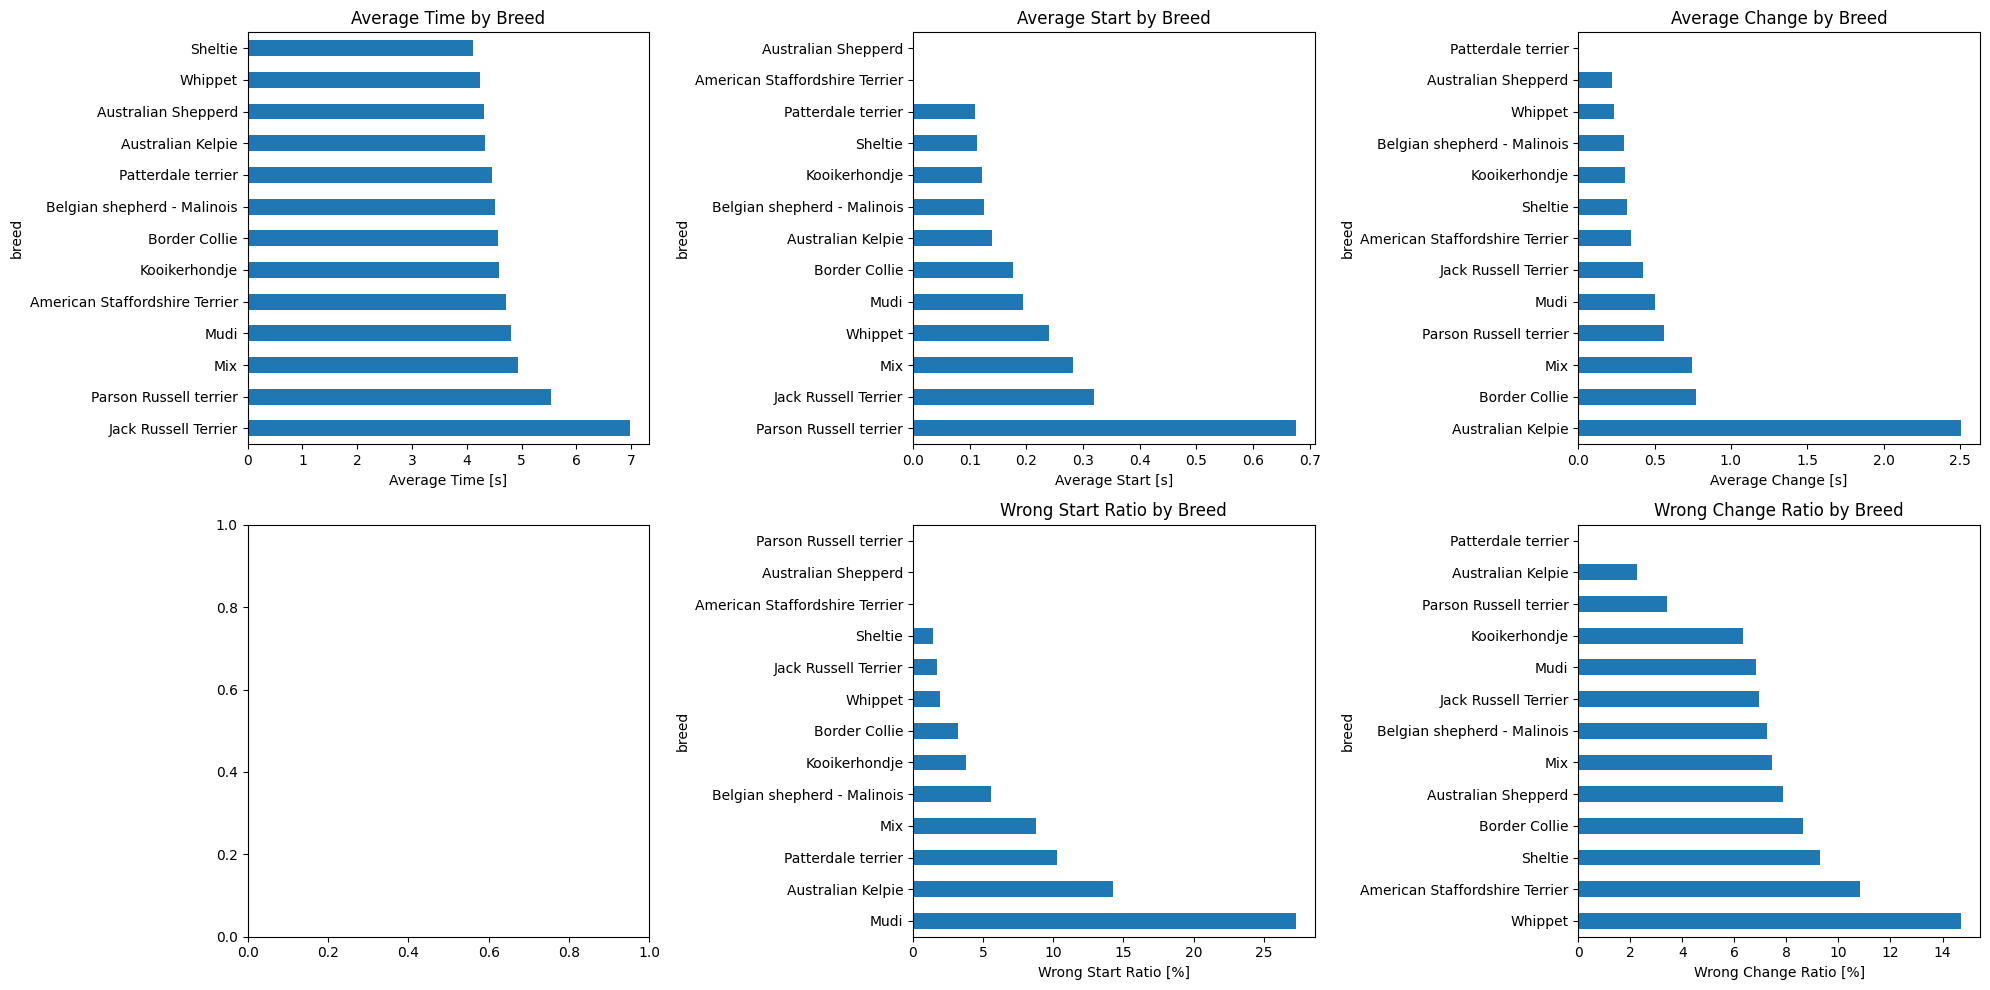

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

df_dogs.groupby('breed')['avg_time'].mean().sort_values(ascending=False).plot.barh(ax=axs[0, 0])
axs[0, 0].set_title('Average Time by Breed')
axs[0, 0].set_xlabel('Average Time [s]')

df_dogs.groupby('breed')['avg_start'].mean().sort_values(ascending=False).plot.barh(ax=axs[0, 1])
axs[0, 1].set_title('Average Start by Breed')
axs[0, 1].set_xlabel('Average Start [s]')

df_dogs.groupby('breed')['avg_change'].mean().sort_values(ascending=False).plot.barh(ax=axs[0, 2])
axs[0, 2].set_title('Average Change by Breed')
axs[0, 2].set_xlabel('Average Change [s]')

df_dogs.groupby('breed')['wrong_start_ratio'].mean().sort_values(ascending=False).plot.barh(ax=axs[1, 1])
axs[1, 1].set_title('Wrong Start Ratio by Breed')
axs[1, 1].set_xlabel('Wrong Start Ratio [%]')

df_dogs.groupby('breed')['wrong_change_ratio'].mean().sort_values(ascending=False).plot.barh(ax=axs[1, 2])
axs[1, 2].set_title('Wrong Change Ratio by Breed')
axs[1, 2].set_xlabel('Wrong Change Ratio [%]')

plt.tight_layout()
plt.show()

## Female dogs are better in change

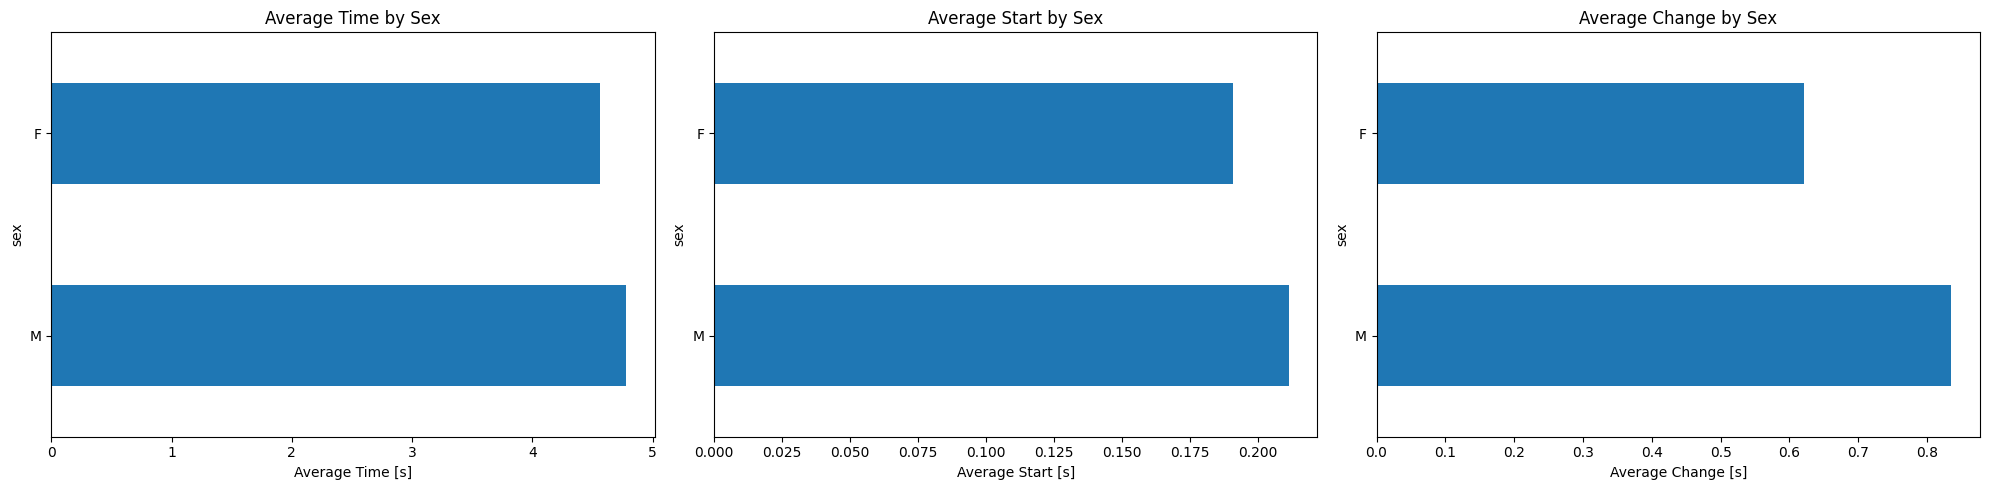

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

df_dogs.groupby('sex')['avg_time'].mean().sort_values(ascending=False).plot.barh(ax=axs[0])
axs[0].set_title('Average Time by Sex')
axs[0].set_xlabel('Average Time [s]')

df_dogs.groupby('sex')['avg_start'].mean().sort_values(ascending=False).plot.barh(ax=axs[1])
axs[1].set_title('Average Start by Sex')
axs[1].set_xlabel('Average Start [s]')

df_dogs.groupby('sex')['avg_change'].mean().sort_values(ascending=False).plot.barh(ax=axs[2])
axs[2].set_title('Average Change by Sex')
axs[2].set_xlabel('Average Change [s]')

plt.tight_layout()
plt.show()

## Neutered dogs are better in start and change

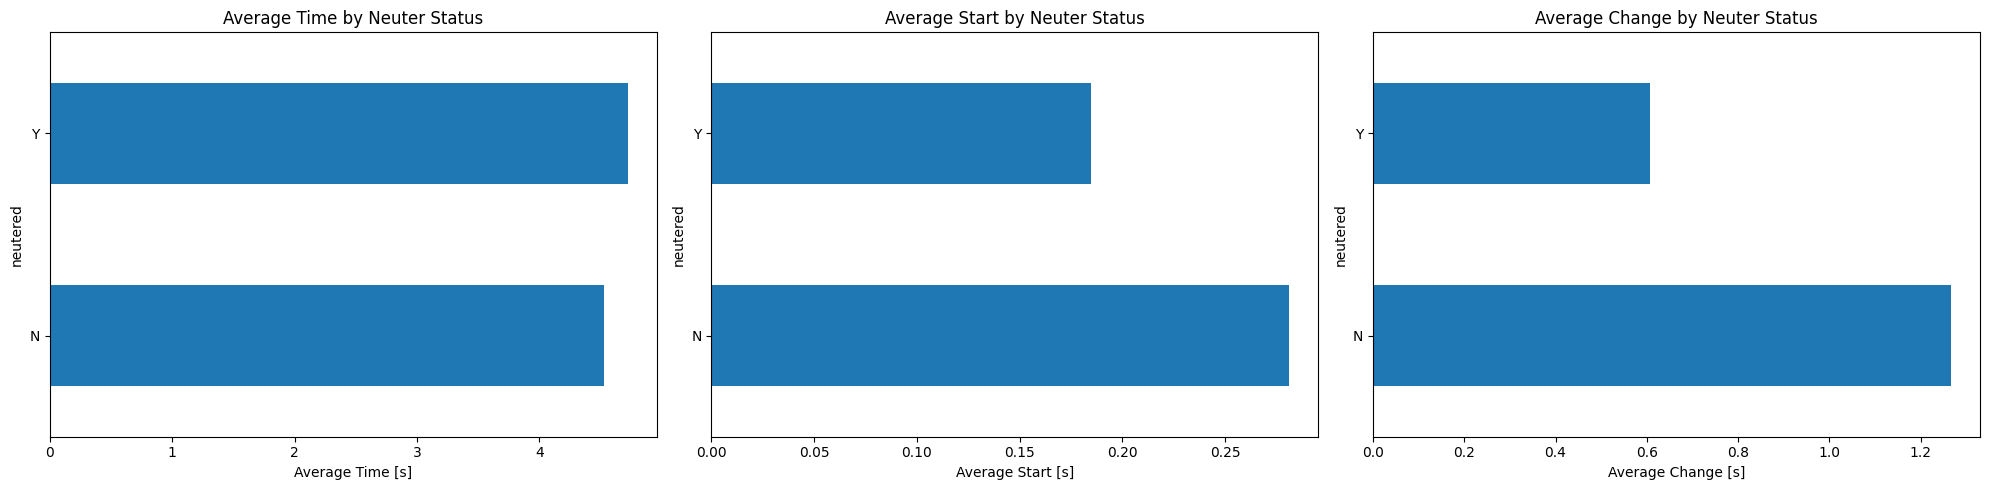

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

df_dogs.groupby('neutered')['avg_time'].mean().plot.barh(ax=axs[0])
axs[0].set_title('Average Time by Neuter Status')
axs[0].set_xlabel('Average Time [s]')

df_dogs.groupby('neutered')['avg_start'].mean().plot.barh(ax=axs[1])
axs[1].set_title('Average Start by Neuter Status')
axs[1].set_xlabel('Average Start [s]')

df_dogs.groupby('neutered')['avg_change'].mean().plot.barh(ax=axs[2])
axs[2].set_title('Average Change by Neuter Status')
axs[2].set_xlabel('Average Change [s]')

plt.tight_layout()
plt.show()

## Younger dogs run faster

We have a 14 years old dog with an average performance. His age is probably wrong in the dataset

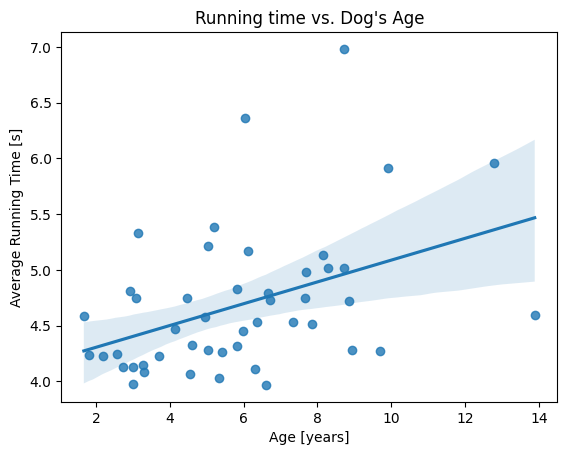

In [31]:
sns.regplot(data=df_dogs, x='age', y='avg_time')
plt.xlabel('Age [years]')
plt.ylabel('Average Running Time [s]')
plt.title("Running time vs. Dog's Age")
plt.show()


## Larger dogs run faster

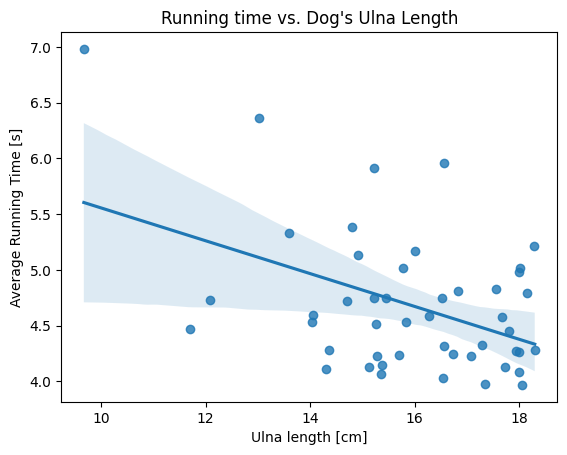

In [32]:
sns.regplot(data=df_dogs, x='ulna_length', y='avg_time')
plt.xlabel('Ulna length [cm]')
plt.ylabel('Average Running Time [s]')
plt.title("Running time vs. Dog's Ulna Length")
plt.show()


## Not every border collies are good, but the best performing dogs, in terms of running time, start and change times, are usually border collies

On the other hand, border collies are highly overrepresented in the sample, so it is difficult to draw a clear conclusion in this case

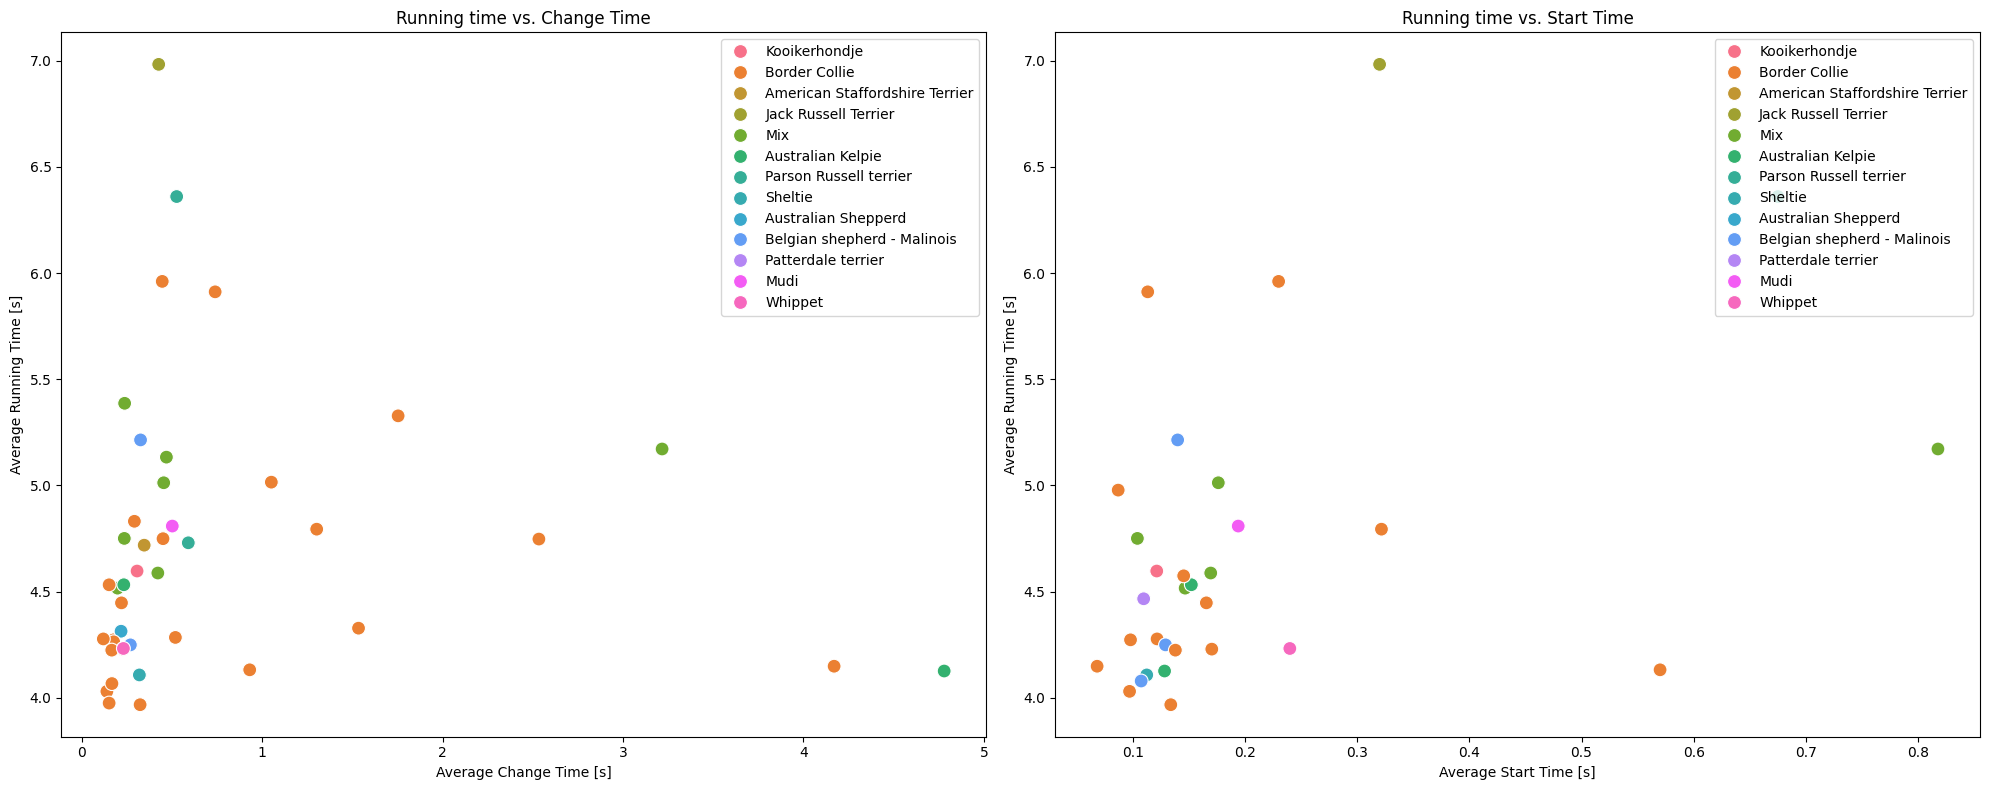

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=df_dogs, x='avg_change', y='avg_time', hue='breed', s=100, ax=axs[0])
axs[0].set_title("Running time vs. Change Time")
axs[0].set_ylabel('Average Running Time [s]')
axs[0].set_xlabel('Average Change Time [s]')
axs[0].legend(loc='upper right')

sns.scatterplot(data=df_dogs, x='avg_start', y='avg_time', hue='breed',s=100,  ax=axs[1])
axs[1].set_title("Running time vs. Start Time")
axs[1].set_ylabel('Average Running Time [s]')
axs[1].set_xlabel('Average Start Time [s]')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

## Start and Change performance

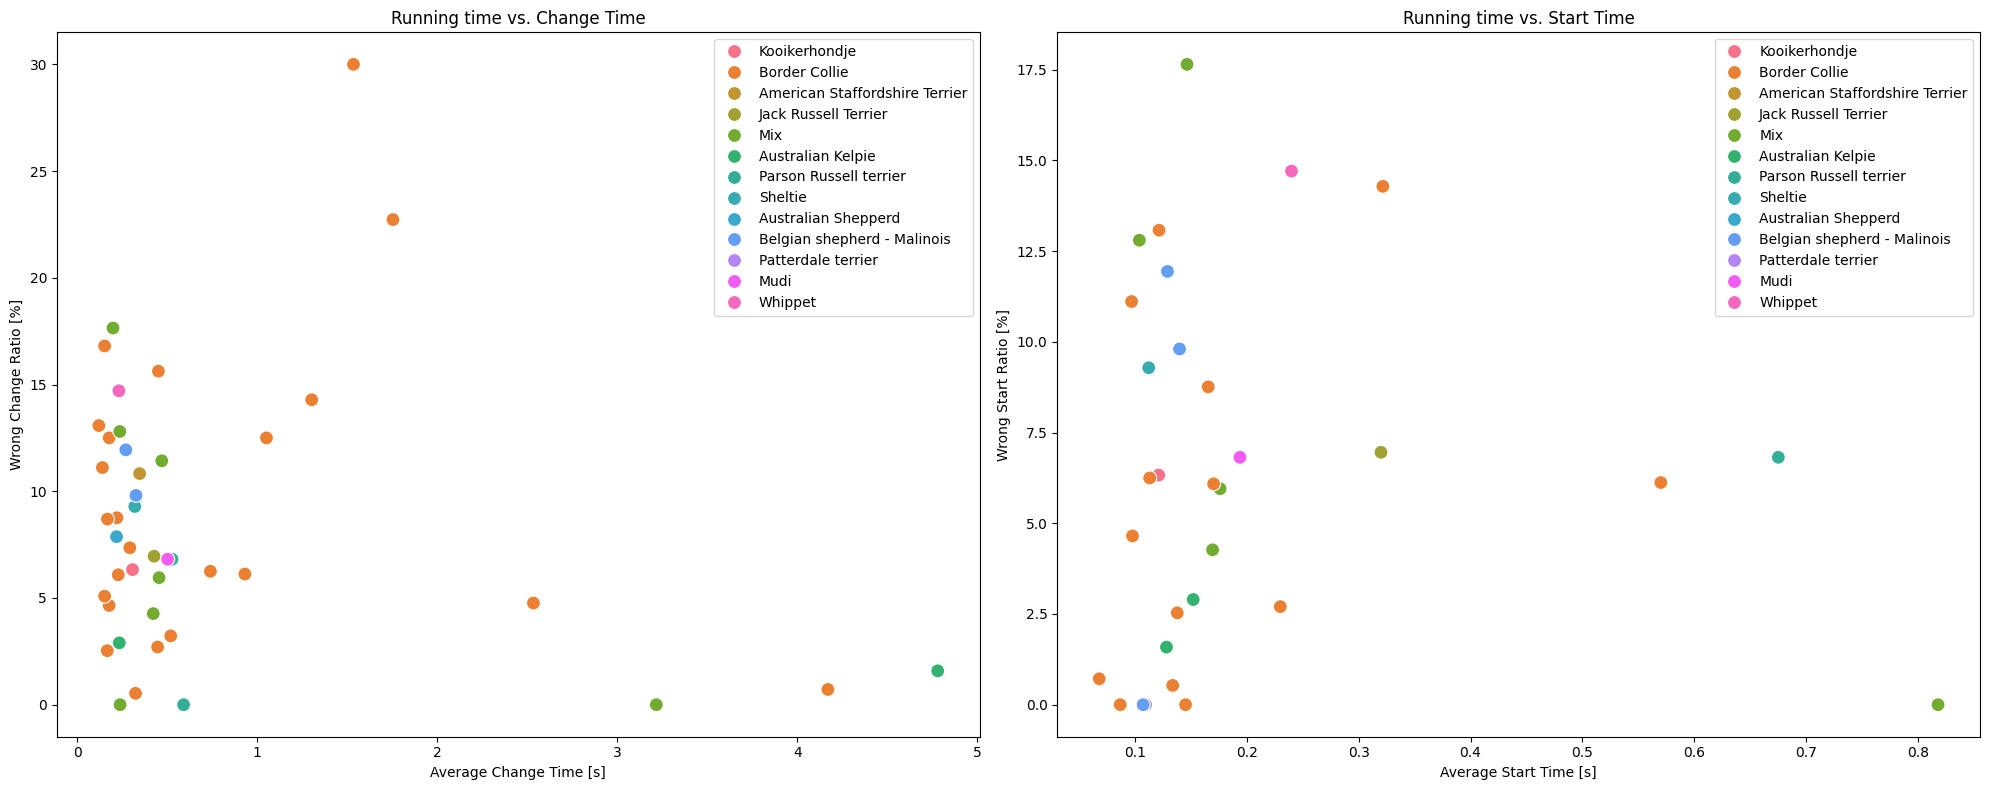

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.scatterplot(data=df_dogs, x='avg_change', y='wrong_change_ratio', hue='breed', s=100, ax=axs[0])
axs[0].set_title("Running time vs. Change Time")
axs[0].set_ylabel('Wrong Change Ratio [%]')
axs[0].set_xlabel('Average Change Time [s]')
axs[0].legend(loc='upper right')

sns.scatterplot(data=df_dogs, x='avg_start', y='wrong_change_ratio', hue='breed',s=100,  ax=axs[1])
axs[1].set_title("Running time vs. Start Time")
axs[1].set_ylabel('Wrong Start Ratio [%]')
axs[1].set_xlabel('Average Start Time [s]')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

## No correlation between change time and wrong change ratio and between start time and wrong start ratio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


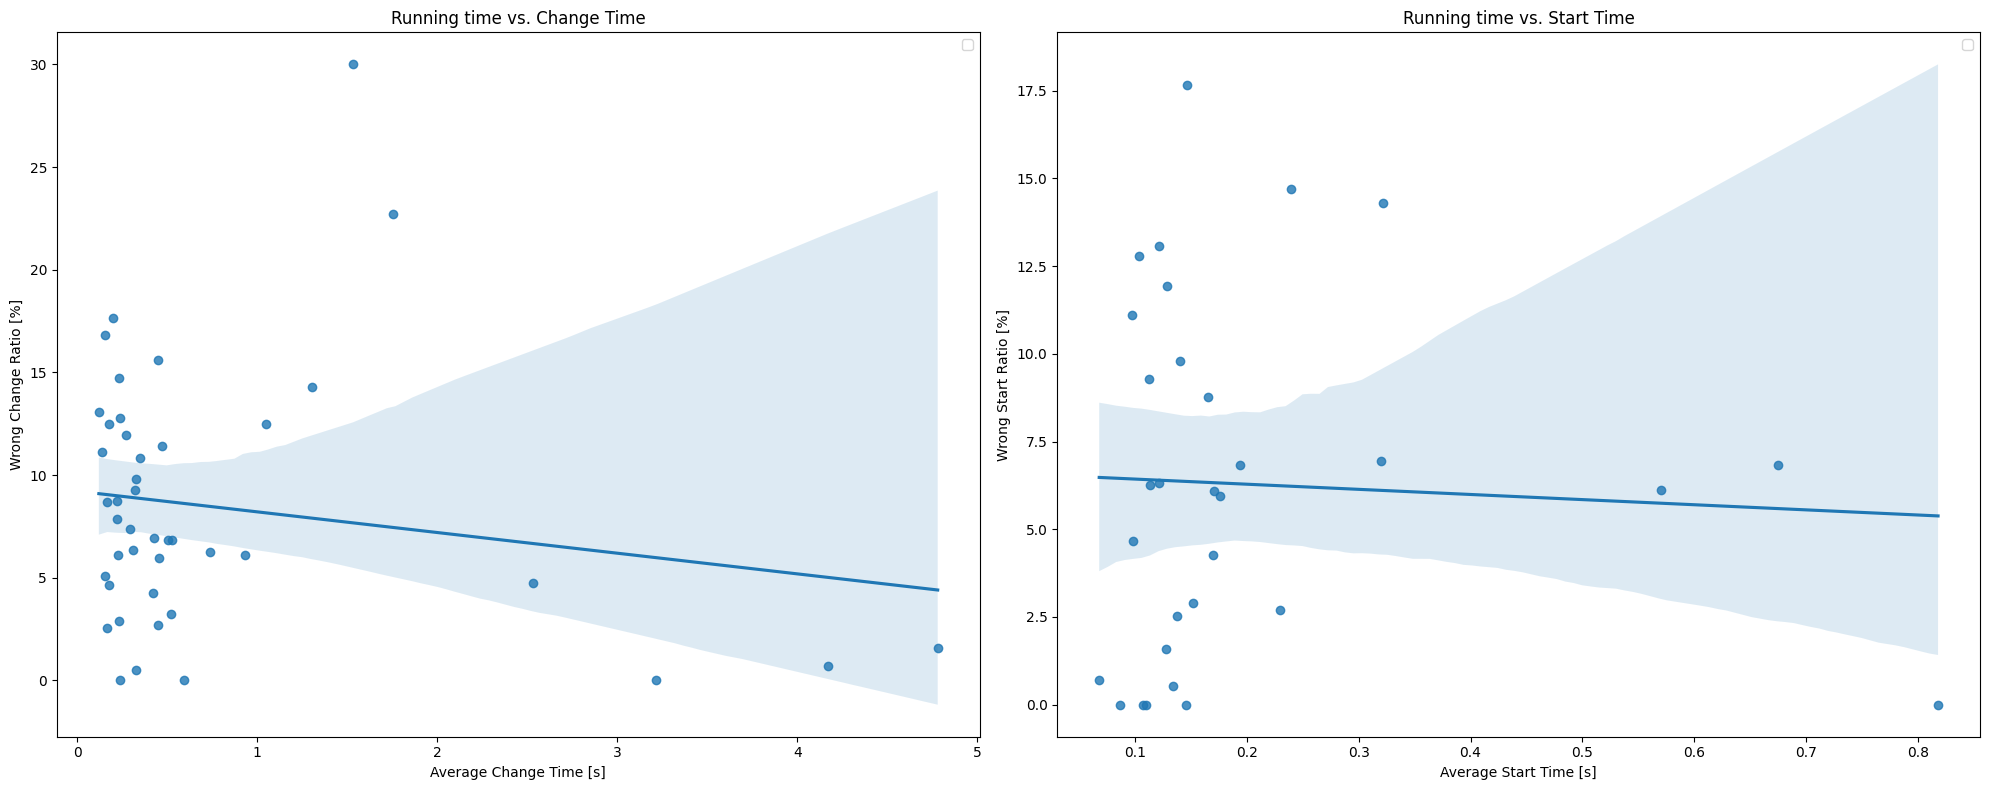

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.regplot(data=df_dogs, x='avg_change', y='wrong_change_ratio', ax=axs[0])
axs[0].set_title("Running time vs. Change Time")
axs[0].set_ylabel('Wrong Change Ratio [%]')
axs[0].set_xlabel('Average Change Time [s]')
axs[0].legend(loc='upper right')

sns.regplot(data=df_dogs, x='avg_start', y='wrong_change_ratio',  ax=axs[1])
axs[1].set_title("Running time vs. Start Time")
axs[1].set_ylabel('Wrong Start Ratio [%]')
axs[1].set_xlabel('Average Start Time [s]')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()